# Introdução

Em 1912, o navio Titanic bateu em um iceberg, e este acidente causou uma série de mortes, sendo um dos maiores desastres da história.
Nesta análise, irei explorar se os fatores sexo, idade e classe socio-econômica foram influenciadores para a sobrevivência
dos passageiros do Titanic.

# Perguntas
### 1 - Qual gênero possui o maior número de sobreviventes?
### 2 - Qual a faixa etária com o maior número de sobreviventes?
### 3 - Ainda sobre a faixa etária, compare sobreviventes e não sobreviventes.
### 4 - A maior parte dos sobreviventes foram das classes mais altas?

In [67]:
# função que aplica estilos nos gráficos
def aplicar_estilo(chart,xlabel,ylabel,title):
    chart.title(title,fontsize=20)
    chart.xlabel(xlabel,fontsize=15)
    chart.ylabel(ylabel,fontsize=15)
    
# cores dos gráficos de barras
colors=['Red','Blue']

# Lendo o conjunto de dados

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

df_titanic=pd.read_csv('titanic-data-6.csv')

In [69]:
# primeiras linhas
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Descrição das colunas
* <b>Survived:</b> Diz se o passageiro sobreviveu (0 = Não; 1 = Sim)
 
* <b>Pclass:</b> Classe socio-econômica do passageiro (1 = Classe Alta; 2 = Classe Média; 3 = Classe Baixa)
 
* <b>Name:</b> Nome do passageiro
 
* <b>Sex:</b> Sexo do Passageiro
 
* <b>Age:</b> Idade do passageiro
 
* <b>SibSp:</b> Número de irmãos e cônjuges a bordo
 
* <b>Parch:</b> Número de pais e filhos a bordo
 
* <b>Ticket:</b> Número do ticket do passageiro
 
* <b>Fare:</b> Tarifa paga pelo passageiro
 
* <b>Cabin:</b> Número da cabine

* <b>Embarked:</b> Porta de embarcação (C = Cherbourg; Q = Queenstown; S = Southampton)

In [70]:
# dimensões do conjunto
df_titanic.shape

(891, 12)

# Limpeza dos dados

## Verificando se há dados duplicados

In [71]:
df_titanic.duplicated().sum()

0

### Não há dados duplicados

## Analisando nulos

In [72]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Há nulos nas colunas Age, Cabin e Embarked

### Preenchendo nulos com a média das idades

In [73]:
# Como grande parte dos dados são compostos de nulos, irei preecher a média das idades
df_titanic.Age.fillna(df_titanic.Age.mean(),inplace=True)

## Deletando colunas irrelevantes

In [74]:
df_titanic.drop(['Cabin','Embarked','Ticket','Name'],axis=1,inplace=True)

In [75]:
# conferindo se restaram nulos
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

## Alterando o tipo de dados de idade para int

In [76]:
df_titanic['Age']=df_titanic['Age'].astype(int)

In [77]:
# Novas dimensões do conjunto de dados
df_titanic.shape

(891, 8)

# Questões

## Questão 1 - Qual gênero possui o maior número de sobreviventes?
Nesta seção explorei se a maioria dos sobreviventes foram do sexo feminino ou masculino

### Gráfico comparando sobreviventes x não sobreviventes por gênero

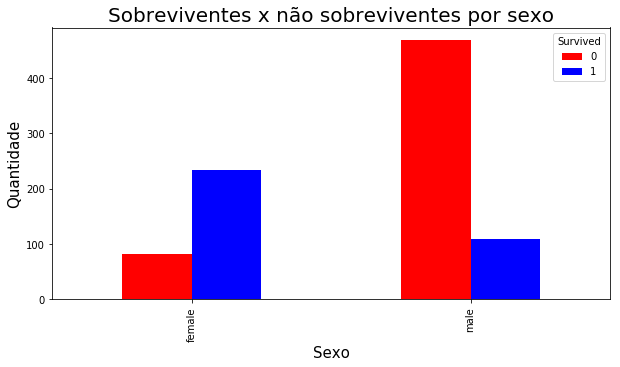

In [93]:
% matplotlib inline
df_gender=df_titanic.groupby(['Sex', 'Survived']).size().unstack()
df_gender.plot.bar(figsize=(10,5),color=colors)
aplicar_estilo(plt,'Sexo','Quantidade','Sobreviventes x não sobreviventes por sexo')

### Resposta Questão 1:
Apesar de mais passageiros do sexo masculino terem embarcado, os passageiros do sexo feminino tiveram maior representatividade entre os sobreviventes

## Questão 2 - Qual a faixa etária com maior número de sobreviventes?
Distribuição de sobreviventes por faixa etária

### trazendo todos os sobreviventes por faixa etária

In [79]:
# Criando os ranges de idades
ranges=[0,10,20,30,40,50,60,70,80]
range_labels=['Crianças','Adolescentes','Adultos > 20','Adultos > 30','Adultos > 40','Adultos > 50','Idosos > 60', 'Idosos > 70']
df_titanic['Age_Range']=pd.cut(df_titanic['Age'],ranges,labels=range_labels)

In [80]:
# Quantidade por Range
df_titanic.groupby('Age_Range').Survived.count()

Age_Range
Crianças         57
Adolescentes    116
Adultos > 20    408
Adultos > 30    155
Adultos > 40     84
Adultos > 50     42
Idosos > 60      18
Idosos > 70       4
Name: Survived, dtype: int64

Survived        1
Age_Range        
Crianças       31
Adolescentes   44
Adultos > 20  136
Adultos > 30   69
Adultos > 40   33
Adultos > 50   17
Idosos > 60     4
Idosos > 70     1


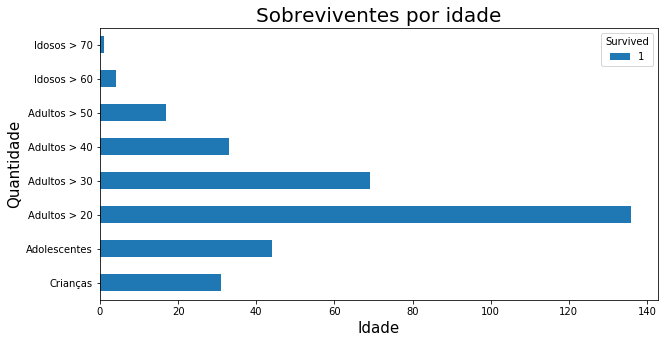

In [86]:
% matplotlib inline
df_age=df_titanic.query('Survived==1').groupby(['Age_Range', 'Survived'],as_index=False).size().unstack()
print(df_age)

# Criando o gráfico
df_age.plot.barh(figsize=(10,5))
aplicar_estilo(plt,'Idade','Quantidade','Sobreviventes por idade')

### Resposta Questão 2: A maior parte dos sobreviventes tem entre 20 e 30 anos

## Questão 3 - Ainda sobre a faixa etária, compare sobreviventes e não sobreviventes

### Comparação por faixa etária entre sobreviventes e não sobreviventes

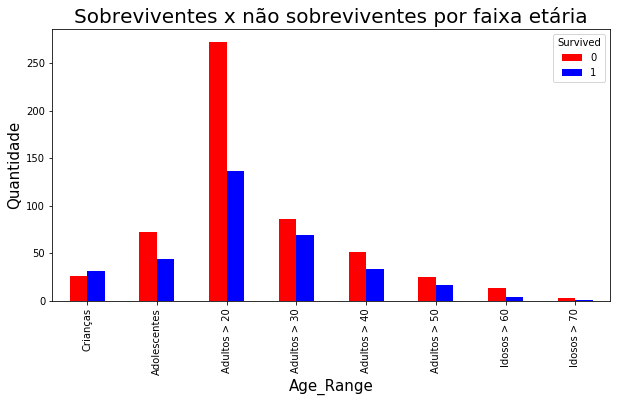

In [82]:
df_survived_by_age=df_titanic.groupby(['Age_Range', 'Survived'],as_index=False).size().unstack()

# Criando o gráfico
df_survived_by_age.plot.bar(figsize=(10,5),color=colors)
aplicar_estilo(plt,'Age_Range','Quantidade','Sobreviventes x não sobreviventes por faixa etária')

### Resposta Questão 3 - Analisando este gráfico, notamos que há uma aproximação maior entre crianças, comparando sobreviventes e não sobreviventes

## Questão 4 - Foram priorizados passageiros de classes mais altas?

### A análise será feita através do percentual de sobreviventes, já que as classes possuem diferentes números de passageiros

In [83]:
# Valores para mapear os resultados, para que seja mostrada a categoria ao invés do código
values={1:'Alta',2:'Média',3:'Baixa'}
df_titanic.Pclass=df_titanic.Pclass.map(values)
df_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_Range
0,1,0,Baixa,male,22,1,0,7.2500,Adultos > 20
1,2,1,Alta,female,38,1,0,71.2833,Adultos > 30
2,3,1,Baixa,female,26,0,0,7.9250,Adultos > 20
3,4,1,Alta,female,35,1,0,53.1000,Adultos > 30
4,5,0,Baixa,male,35,0,0,8.0500,Adultos > 30


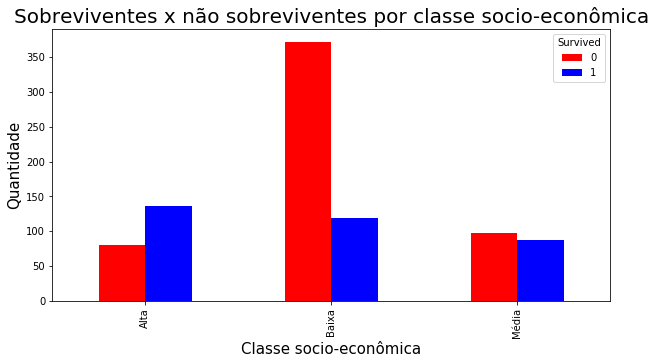

In [99]:
df_survived_by_class=df_titanic.groupby(['Pclass', 'Survived'],as_index=False).size().unstack()

# Criando o gráfico
df_survived_by_class.plot.bar(figsize=(10,5),color=colors)
aplicar_estilo(plt,'Classe socio-econômica','Quantidade','Sobreviventes x não sobreviventes por classe socio-econômica')

### Resposta Questão 4: 
Apesar de a quantidade de sobreviventes ser parecida, há uma grande diferença entre sobreviventes e não sobreviventes da classe baixa. Portanto podemos deduzir que as classes média e alta foram priorizadas no resgate.

# Conclusão
Apesar de termos uma amostra considerável de passageiros, trabalhamos com alguns dados nulos, portanto essa análise não pôde
ser 100% precisa. No entanto, podemos estimar que durante o acidente, foram priorizadas mulheres, crianças e pessoas de classes
mais altas